In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mph.mph import MPH
from mph.utilities import plot_spectrum

In [2]:
vibmax = 5
Ef = 14000
omega = 1400
lambda_f = 1.0

In [3]:
nmol = 1
J = np.zeros(nmol)

monomer = MPH(1, vibmax, omega, Ef, J, lambda_f) # J > 0, H-aggregate
monomer.kernel()
monomer.get_abs_spectrum(gamma=0.28*omega, window=35000)

In [4]:
# Simulation to match Fig. 15 in Hestand, Spano, Chem. Rev. 2018, 118, 15, 7069-7163
nmol = 20

# These correspond to exciton bandwiths of 
# W = [1/2hw, hw, 2hw, 4hw, 6hw]
# The exciton band width is defined as W = |J(k=0) - J(k=pi)| = 4|J| for PBC
# with nearest-neighbor interactions, where J(k) = 2Jcos(k)
Jval = [0.5*omega/4, omega/4, 2*omega/4, omega, 6*omega/4]

Hagg = []
Jagg = []
for i, jv in enumerate(Jval):
    J = np.zeros(nmol)
    
    J[1] = jv
    Hagg.append(MPH(nmol, vibmax, omega, Ef, J, lambda_f)) # Jc > 0
    Hagg[-1].kernel()

    J[1] = -jv
    Jagg.append(MPH(nmol, vibmax, omega, Ef, J, lambda_f)) # Jc < 0
    Jagg[-1].kernel()


/Users/harellab/opt/anaconda3/envs/mph_env/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


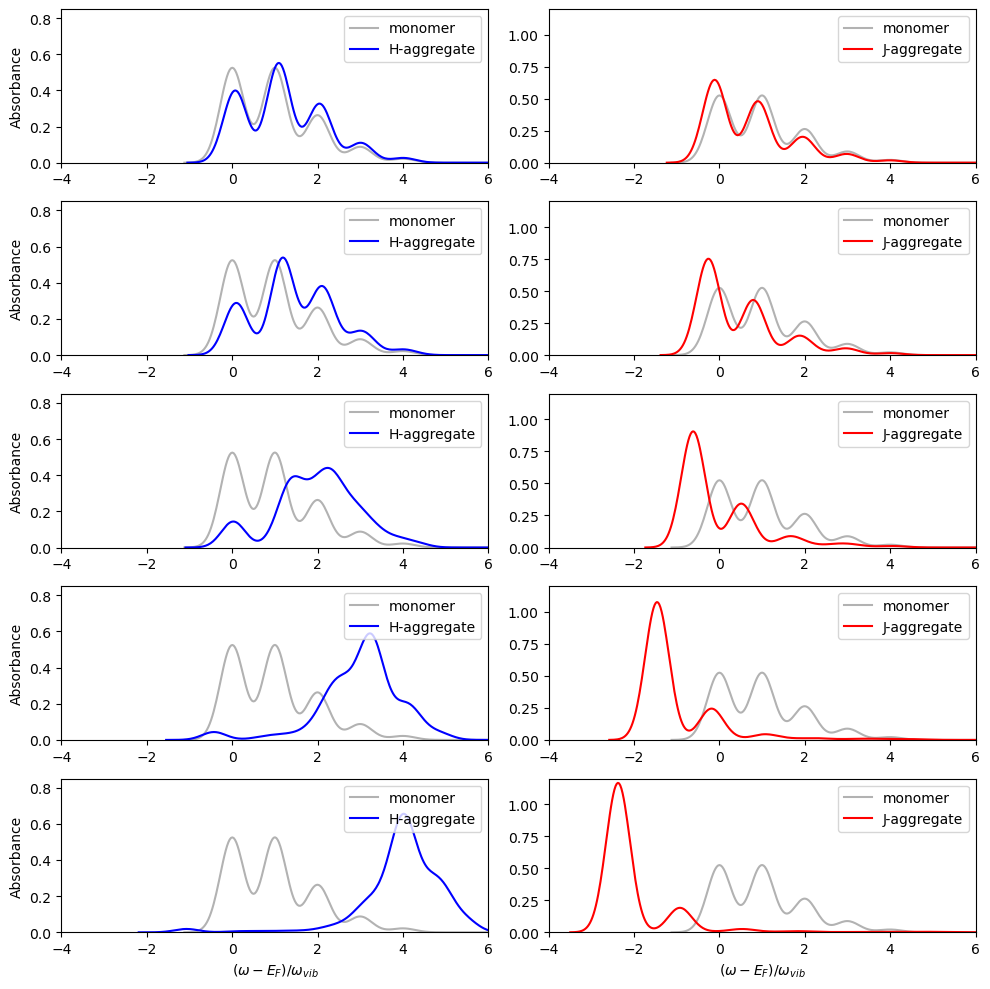

In [5]:
figure = plt.figure(figsize=(10,10))

for i, jv in enumerate(Jval):
    
    Hagg[i].get_abs_spectrum(gamma=0.28*omega, window=35000)
    Jagg[i].get_abs_spectrum(gamma=0.28*omega, window=35000)
    
    plt.subplot(5,2,2*(i+1)-1)
    plt.plot((monomer.photon_energy - Ef)/omega, monomer.absorbance, color="black", alpha=0.3, label="monomer")
    plt.plot((Hagg[i].photon_energy - Ef)/omega, Hagg[i].absorbance, color="blue", label="H-aggregate")
    plt.ylim([0, 0.85])
    plt.xlim([-4, 6])
    plt.legend(loc=1)

    plt.tight_layout()
    
    plt.ylabel("Absorbance")
    if i == 4:
        plt.xlabel(r"$(\omega - E_F)/\omega_{vib}$") 
        
    plt.subplot(5,2,2*(i+1))
    plt.plot((monomer.photon_energy - Ef)/omega, monomer.absorbance, color="black", alpha=0.3, label="monomer")
    plt.plot((Jagg[i].photon_energy - Ef)/omega, Jagg[i].absorbance, color="red", label="J-aggregate")
    plt.ylim([0, 1.2])
    plt.xlim([-4, 6])
    plt.legend(loc=1)
    
    if i == 4:
        plt.xlabel(r"$(\omega - E_F)/\omega_{vib}$") 

    plt.tight_layout()

/Users/harellab/opt/anaconda3/envs/mph_env/lib/python3.9/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$(\\omega - E_F)/\\omega_{vib}$')

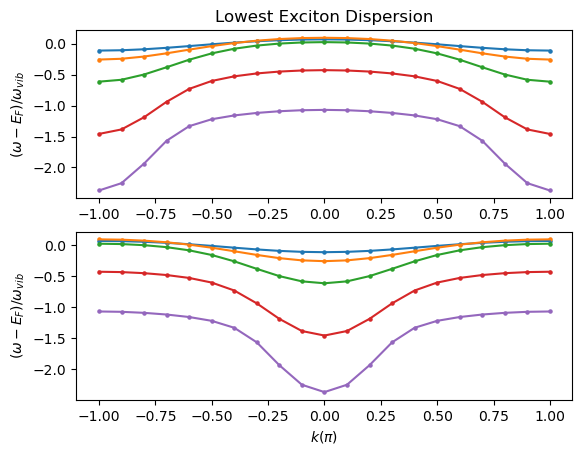

In [6]:
plt.subplot(2,1,1)
plt.title("Lowest Exciton Dispersion")
for i in range(len(Hagg)):
    plt.plot(Hagg[i].k/np.pi, (Hagg[i].evals[:, 0] - Ef)/omega)
    plt.scatter(Hagg[i].k/np.pi, (Hagg[i].evals[:, 0] - Ef)/omega, s=5)
plt.ylabel(r"$(\omega - E_F)/\omega_{vib}$")
plt.subplot(2,1,2)
for i in range(len(Jagg)):
    plt.plot(Jagg[i].k/np.pi, (Jagg[i].evals[:, 0] - Ef)/omega)
    plt.scatter(Jagg[i].k/np.pi, (Jagg[i].evals[:, 0] - Ef)/omega, s=5)
plt.xlabel(r"$k (\pi)$")
plt.ylabel(r"$(\omega - E_F)/\omega_{vib}$")